In [ ]:
# @title
import math
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt


In [ ]:
deliveries = pd.read_csv('C:\deliveries.csv')
matches = pd.read_csv('C:\matches.csv')

In [ ]:
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
      return balls/dismissals
    else:
      return balls/1

def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
       return balls/boundaries
    else:
       return balls/1


def player_Statistics(df):


    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batter'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['batter'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batter'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batter'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batter'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batter'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'batter').merge(balls, on = 'batter').merge(dismissals, on = 'batter').merge(dots, on = 'batter').merge(ones, on = 'batter').merge(twos, on = 'batter').merge(threes, on = 'batter').merge(fours, on = 'batter').merge(sixes, on = 'batter')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df


In [ ]:
df = player_Statistics(deliveries)

In [ ]:
df.head()

,batter,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,23,399,325,18,127,124,28,3,24,19,122.769231,17.347826,18.055556,7.558140
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


In [ ]:
def phase(over):
    if over <= 6:
      return 'Powerplay'
    if over <= 15:
      return 'Middle_overs'
    else:
      return 'Death_overs'

In [ ]:
deliveries['phase'] = deliveries['over'].apply(lambda x: phase(x))

In [ ]:
def phasesOfplay(df,current_phase):


    df = df[df.phase == current_phase]
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batter'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['batter'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batter'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batter'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batter'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batter'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'batter').merge(balls, on = 'batter').merge(dismissals, on = 'batter').merge(dots, on = 'batter').merge(ones, on = 'batter').merge(twos, on = 'batter').merge(threes, on = 'batter').merge(fours, on = 'batter').merge(sixes, on = 'batter')

     #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
pp_df = phasesOfplay(deliveries,'Powerplay')
mid_df = phasesOfplay(deliveries, 'Middle_overs')
dth_df = phasesOfplay(deliveries, 'Death_overs')

In [ ]:
pp_df.head()

,batter,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.0,7.0,7.00
1,A Badoni,4,16,27,2,17,8,0,0,2,0,59.259259,4.0,13.5,13.50
2,A Chopra,5,29,45,2,28,13,0,0,4,0,64.444444,5.8,22.5,11.25
3,A Flintoff,1,15,16,0,11,2,0,1,1,1,93.750000,15.0,16.0,8.00
4,A Manohar,4,16,18,1,8,8,0,0,2,0,88.888889,4.0,18.0,9.00


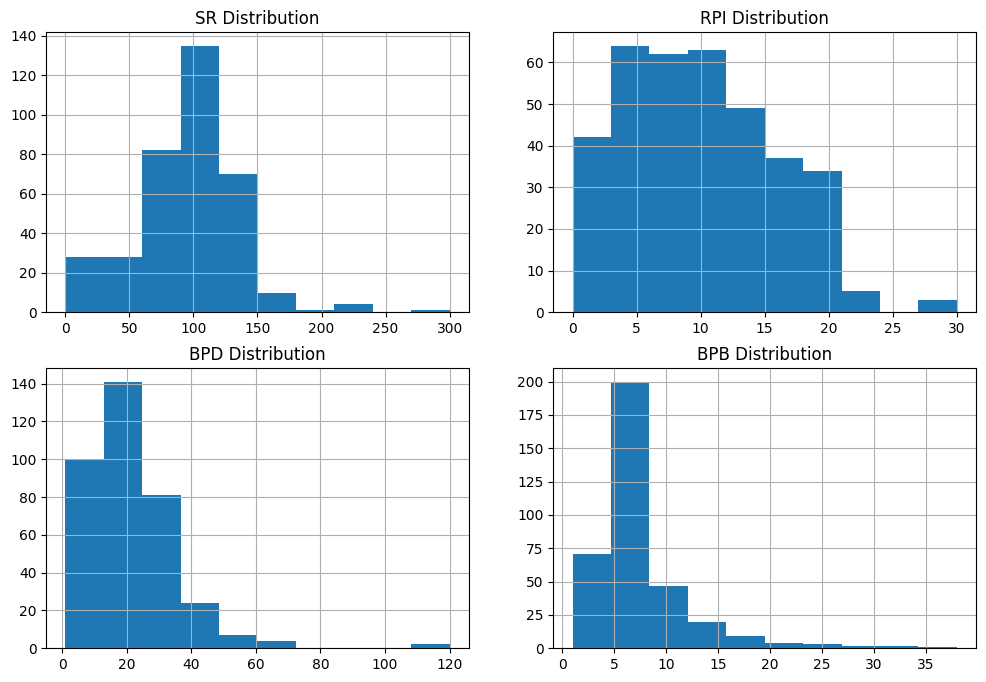

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.subplot(224)
pp_df.BPB.hist()
plt.title('BPB Distribution')

plt.show()

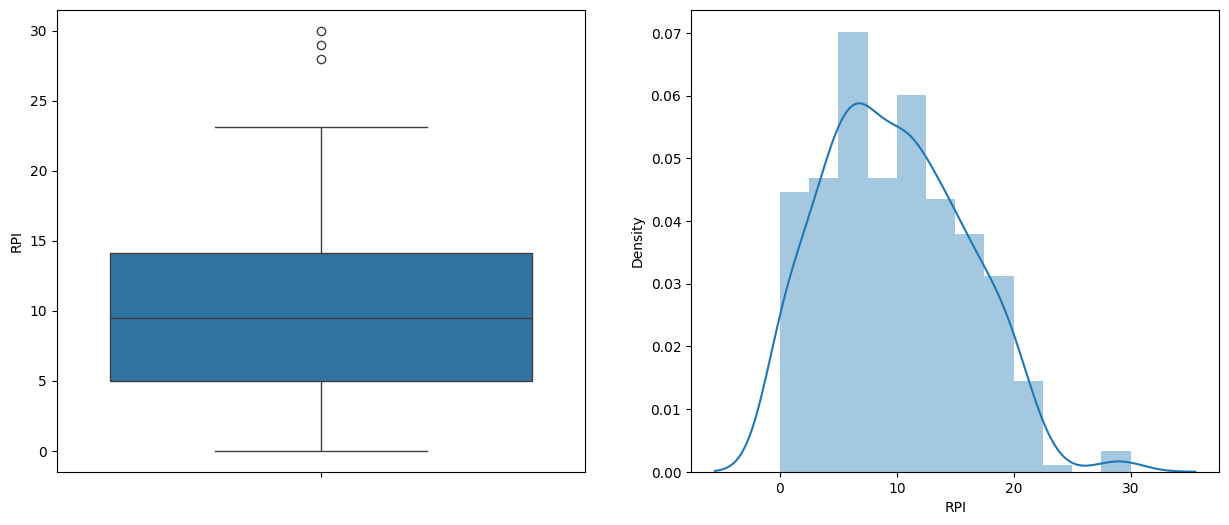

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['RPI'])

plt.subplot(122)
sns.distplot(pp_df['RPI'])
plt.show()

In [ ]:
np.percentile(pp_df['RPI'], 25), np.percentile(pp_df['RPI'], 50),np.percentile(pp_df['RPI'], 75)

(5.0, 9.5, 14.14945652173913)

In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38,0.25,0.12,0.26

In [ ]:
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x)
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(pp_df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis = 0))

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x/sq_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x/sq_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x/sq_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x/sq_bpb)

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x*wt_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x*wt_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x*wt_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpd, worst_bpd = max(pp_df['calc_BPD']), min(pp_df['calc_BPD'])
best_bpb, worst_bpb = min(pp_df['calc_BPB']), max(pp_df['calc_BPB'])

In [ ]:
pp_df['dev_best_SR'] = pp_df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
pp_df['dev_best_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
pp_df['dev_best_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
pp_df['dev_best_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-best_bpb)*(x-best_bpb))

pp_df['dev_best_sqrt'] = pp_df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_BPB'], axis = 1)

pp_df['dev_worst_SR'] = pp_df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
pp_df['dev_worst_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
pp_df['dev_worst_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
pp_df['dev_worst_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))

pp_df['dev_worst_sqrt'] = pp_df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_BPB'], axis =1)

In [ ]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [ ]:
pp_df[['batter', 'score']].head()

,batter,score
0,A Ashish Reddy,0.018854
1,A Badoni,0.013847
2,A Chopra,0.015849
3,A Flintoff,0.027478
4,A Manohar,0.024306


In [ ]:
pp_df =pp_df[pp_df.innings >= 20]

In [ ]:
pp_df[[ 'batter','innings', 'runs', 'balls', 'dismissals', 'fours', 'sixes', 'SR', 'BPB', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(5)

,batter,innings,runs,balls,dismissals,fours,sixes,SR,BPB,score
0,SP Narine,44,688,423,38,86,40,162.647754,3.357143,0.158987
1,YBK Jaiswal,37,808,550,19,113,31,146.909091,3.819444,0.107503
2,CA Lynn,40,875,623,19,103,45,140.449438,4.209459,0.091021
3,JM Bairstow,36,747,537,19,91,31,139.106145,4.401639,0.087271
4,V Sehwag,103,1785,1284,69,250,53,139.018692,4.237624,0.086096


In [ ]:
#THE BEST PINCH HITTER INSIDE PP IN THE IPL SO FAR (MIN 20 INNINGS) TILL 2023 IPL FINAL IS SUNIL NARINE WITH SCORE OF 0.15.